# Spotify Global Streaming Data Analysis Project(2024).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [12]:
df=pd.read_csv(r'C:\Users\mahesh\Downloads\Spotify_2024_Global_Streaming_Data.csv')
df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [13]:
df.isnull().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

In [40]:
df.duplicated().sum()

0

In [41]:
df = df.dropna() 

In [83]:
df['Artist'].nunique()

15

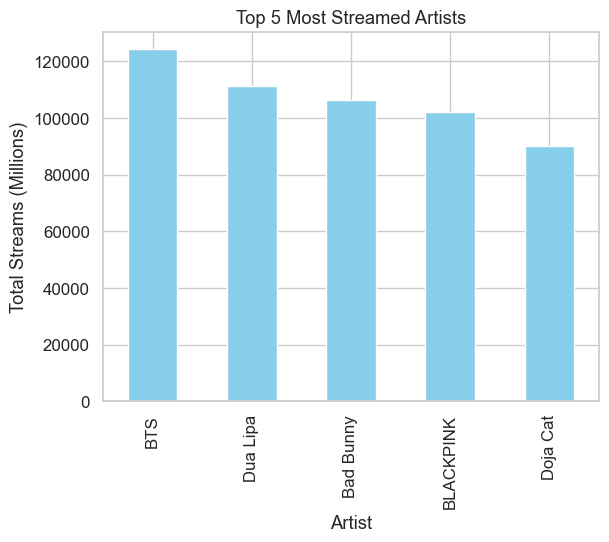

In [80]:
# Top 5 Most Streamed Artists
top_artists = df.groupby('Artist')['Total Streams (Millions)'].sum().nlargest(5)
top_artists.plot(kind='bar', color='skyblue')  
plt.xlabel('Artist')
plt.ylabel('Total Streams (Millions)')
plt.title('Top 5 Most Streamed Artists')
plt.show()

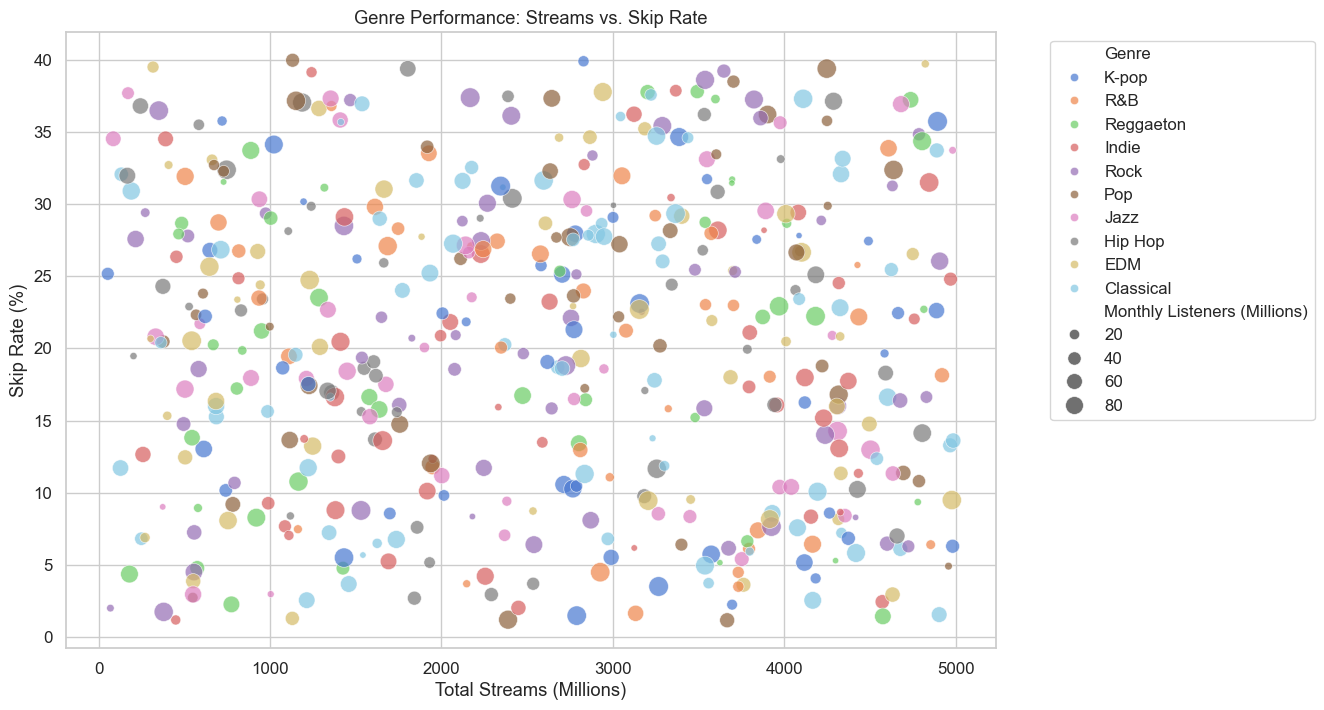

In [43]:
# Genre Analysis Total Streams vs Skip rate

plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Total Streams (Millions)',
    y='Skip Rate (%)',
    size='Monthly Listeners (Millions)',
    hue='Genre',
    data=df,
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Genre Performance: Streams vs. Skip Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


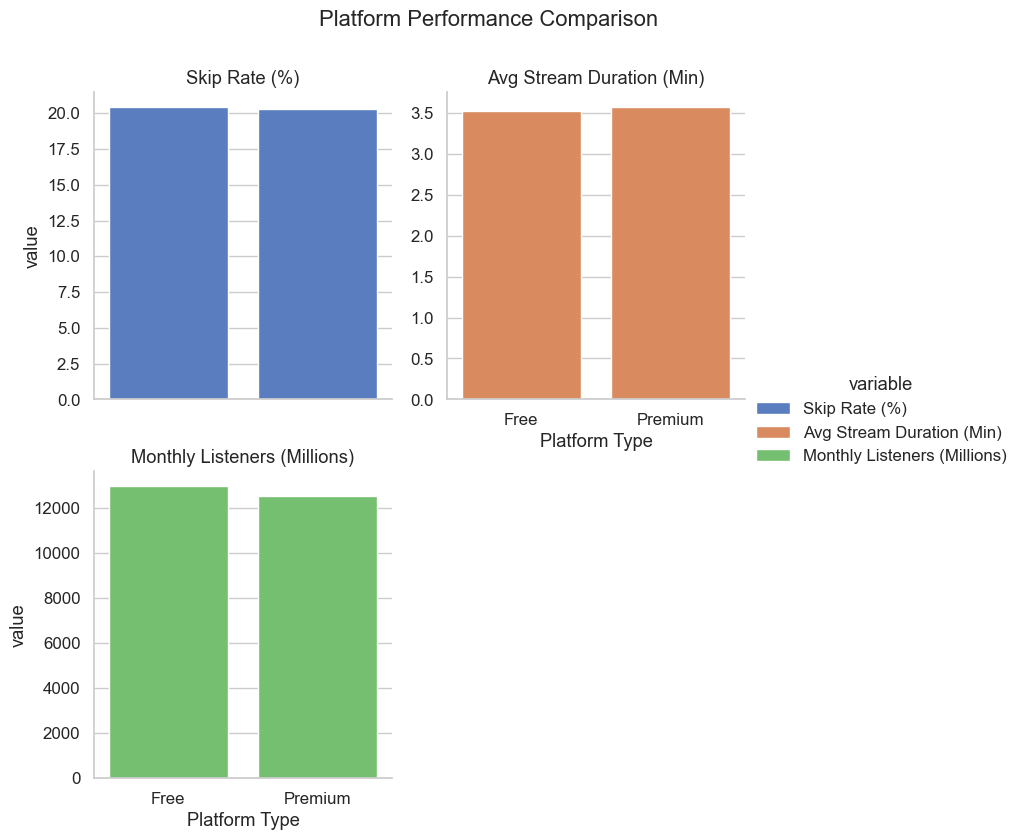

In [19]:
# Platform Performance Comparison.

platform_metrics = df.groupby('Platform Type').agg({
    'Skip Rate (%)': 'mean',
    'Avg Stream Duration (Min)': 'median',
    'Monthly Listeners (Millions)': 'sum'
}).reset_index()

melted = platform_metrics.melt(id_vars='Platform Type')
g = sns.catplot(
    data=melted, kind='bar',
    x='Platform Type', y='value', 
    hue='variable', col='variable',
    col_wrap=2, sharey=False, height=4
)
g.set_titles("{col_name}")
plt.suptitle('Platform Performance Comparison', y=1.05);

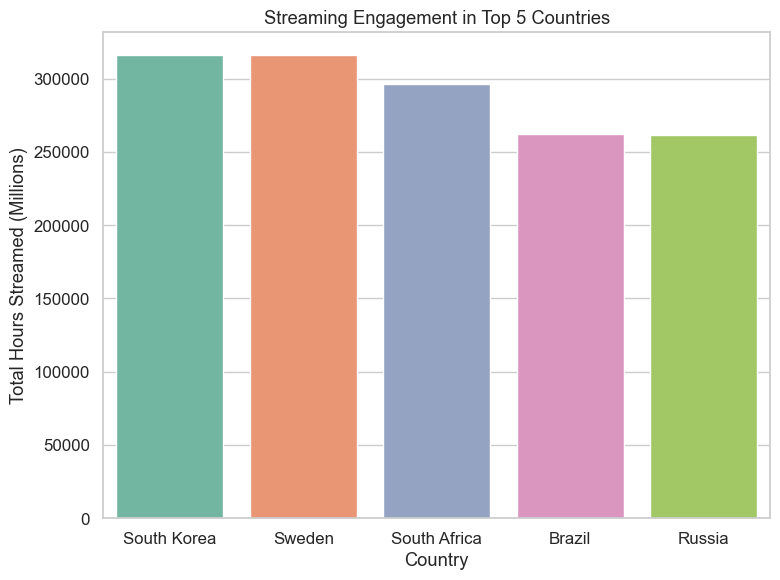

In [123]:
# Streaming Engagement in Top 5 Countries
top_countries = df.groupby('Country')['Total Hours Streamed (Millions)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=top_countries, x='Country', y='Total Hours Streamed (Millions)', palette='Set2', hue='Country')
plt.title('Streaming Engagement in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Hours Streamed (Millions)')
plt.tight_layout()
plt.show()


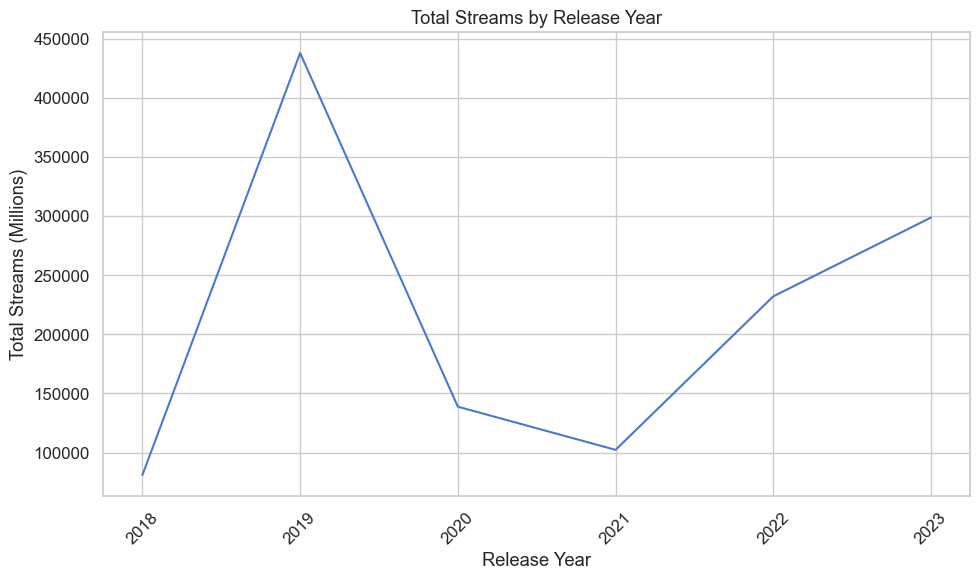

In [37]:
# Total streams By Release Year.

plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('Release Year')['Total Streams (Millions)'].sum().reset_index(), 
             x='Release Year', y='Total Streams (Millions)')
plt.title('Total Streams by Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


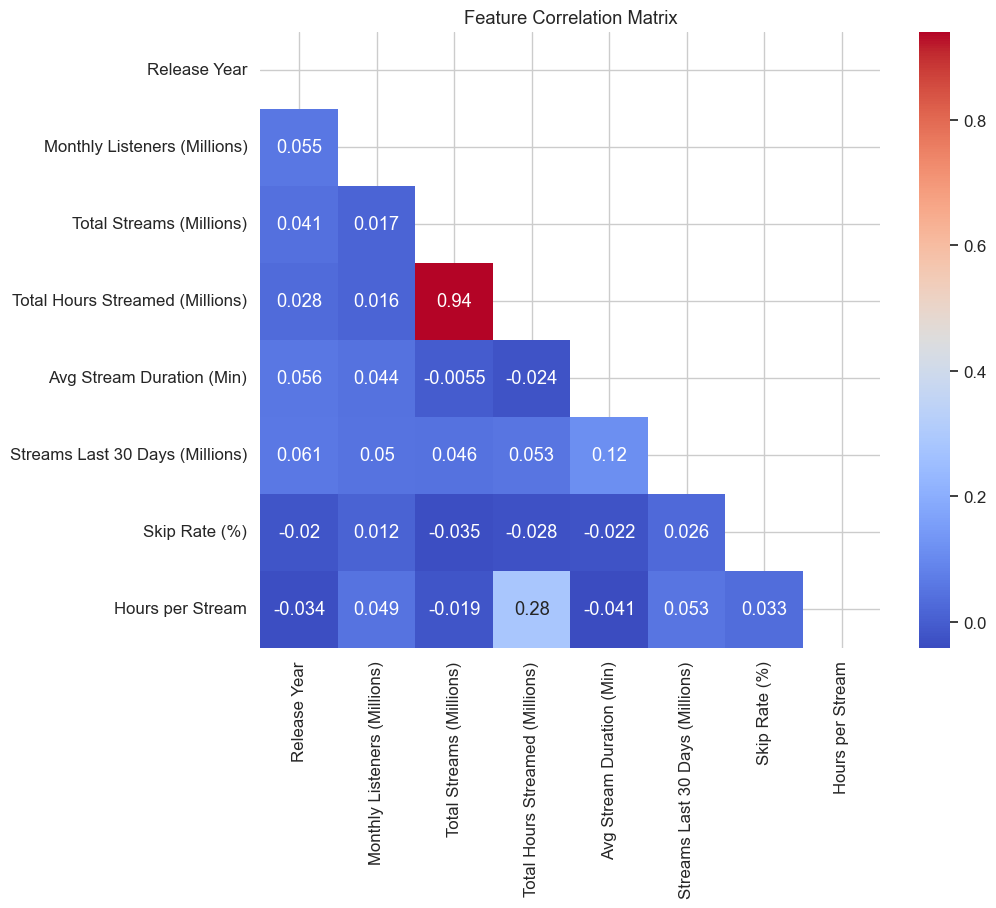

In [38]:
# Correlation matrix

plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Feature Correlation Matrix')
plt.show()

In [69]:
# Engagement Efficiency Score
df['Engagement Score'] = (df['Total Hours Streamed (Millions)'] / 
                         df['Monthly Listeners (Millions)']) * (1 - df['Skip Rate (%)']/100)

# Artist Growth Potential
df['Growth Potential'] = df['Streams Last 30 Days (Millions)'] / df['Release Year'].apply(lambda x: 2025 - x)


In [36]:
# Hours per Stream
df['Hours per Stream'] = df['Total Hours Streamed (Millions)'] / df['Total Streams (Millions)']

# Top Efficient Artists
efficient_artists = df.sort_values('Hours per Stream', ascending=False)[
    ['Artist', 'Genre', 'Hours per Stream']
].head(10)
print(efficient_artists)

             Artist      Genre  Hours per Stream
450        Dua Lipa    Hip Hop          4.493946
434   Ariana Grande        Pop          4.492028
259        Dua Lipa       Rock          4.491389
417        Dua Lipa    Hip Hop          4.488397
286       BLACKPINK       Jazz          4.481354
352  Olivia Rodrigo        EDM          4.475585
268  Olivia Rodrigo       Jazz          4.474735
267   Billie Eilish  Classical          4.473765
56            Drake      K-pop          4.467684
368         Karol G        Pop          4.451646


In [39]:
# Calculate ROI metric
df['ROI'] = df['Total Streams (Millions)'] / df['Monthly Listeners (Millions)']
top_roi = df.nlargest(5, 'ROI')[['Artist', 'Genre', 'ROI']]
print("Most Efficient Artists (Streams per Listener):")
print(top_roi)

Most Efficient Artists (Streams per Listener):
             Artist      Genre          ROI
438       Bad Bunny      K-pop  4045.673267
104  Olivia Rodrigo  Reggaeton  3358.679687
256        Dua Lipa      Indie  3130.620968
11        BLACKPINK  Reggaeton  2745.727273
396        Dua Lipa       Rock  2676.406061


In [66]:
# T-test: Paid vs Free platforms
# Do paid platforms have significantly lower skip rates?
from scipy.stats import ttest_ind

paid = df[df['Platform Type'] == 'Premium']['Skip Rate (%)']
free = df[df['Platform Type'] == 'Free']['Skip Rate (%)']
t_stat, p_value = ttest_ind(paid, free)

print(f"Paid vs. Free Skip Rate Difference: {paid.mean():.1f}% vs {free.mean():.1f}%")
print(f"T-test Results: p-value = {p_value:.4f} {'(significant)' if p_value < 0.05 else ''}")

Paid vs. Free Skip Rate Difference: 20.3% vs 20.5%
T-test Results: p-value = 0.8361 


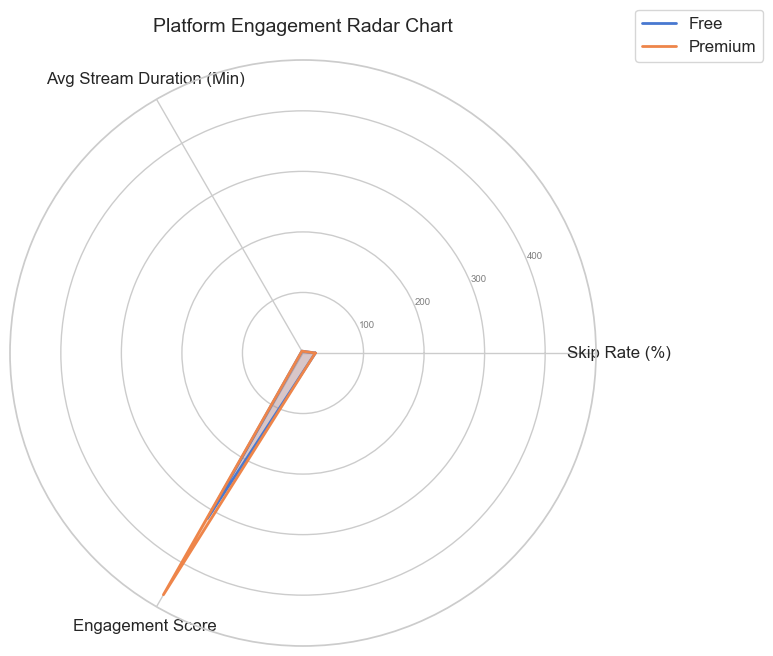

In [70]:
#Platform Engagement Radar Chart.
platform_metrics = df.groupby('Platform Type').agg({
    'Skip Rate (%)': 'mean',
    'Avg Stream Duration (Min)': 'median',
    'Engagement Score': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
categories = platform_metrics.columns[1:]
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for i, row in platform_metrics.iterrows():
    values = row[categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row['Platform Type'])
    ax.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], categories)
plt.yticks(color="grey", size=7)
plt.title("Platform Engagement Radar Chart", size=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# Key Business Insights

1. **Top Artists Dominate Global Streaming :**   
    - **BTS** dominates with the **highest total streams (≈124.2B)**.
    - Other top-performing artists include **Dua Lipa, Bad Bunny, BLACKPINK, and Doja Cat.**
    - This dominance suggests strong global fanbases and effective content strategies.
-------------------
2. **Genre Trends and Listener Engagement :**
    - Most streamed genres: **K-pop, R&B, and Reggaeton.**
    - **Pop and Hip-Hop** show high total streams with **lower skip rates, indicating strong listener retention.** 
    - **Scatterplot analysis** reveals that genres with longer average stream durations typically have **lower skip rates, reflecting deeper listener engagement.**
----------------
3. **Platform Performance Comparison :**
    - Both **Free** and **Paid** platforms show **minimal variation** in skip rates and engagement.
  **📊 Statistical Test (T-Test):**   
    - **Paid Skip Rate: 20.3% vs. Free Skip Rate: 20.5%**
    - **p-value = 0.8361** → **No statistically significant difference in skip behavior.**
    - This suggests pricing tier may not heavily influence user attentiveness.
-----------------------
4. **🌍 Country-wise Streaming Engagement :**
   - There is significant regional variance in total hours streamed:
   -  **South Korea:** 315,992M hours
   -  **Sweden:** 315,892M hours
   -  **South Africa:** 296,354M hours
   -  **Brazil:** 262,070M hours
   -  **Russia:** 261,482M hours
   -  Indicates varying content preferences and consumption intensity across countries.
-------------------------
5. **📆 Temporal Insights :**
     - Majority of albums released between **2019–2023.**   
     - Albums from 2019 (e.g., Ed Sheeran, Post Malone) continue to attract streams.
 **Recent 30-Day Data:**
   - **Ed Sheeran’s** albums show continued engagement, with **~166M and ~173M streams,** reflecting long-term popularity.
--------------
6. **📈 Engagement Efficiency Score :**
   - A custom **Engagement Score** metric captures platform efficiency using:
    (Total Hours Streamed / Monthly Listeners) × (1 - Skip Rate)
   - Platforms with **longer stream durations** and **lower skip rates** scored higher.
   - **The radar chart** visualization clearly distinguishes platforms excelling in user retention and engagement.
-----------------------
7. **⏱ Hours per Stream (Listening Depth):**   
   - Artists with higher **Hours per Stream** offer **more listening time per stream,** indicating:
   - **Deeper content,** stronger storytelling, or **loyal audiences.**
   - Useful for identifying creators with high **content depth and engagement time.**
--------
8. **💡 ROI (Streams per Listener) :**   
   - **ROI metric:** (Total Streams / Monthly Listeners) highlights artists converting audience into consistent listens.
   - High ROI suggests **strong replay value, fan loyalty,** or **hit-driven catalog strength.**
   